Plot diverser Eigenschaften eines Gauss strahls

In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib as mpl
import pyqtgraph as pg  # only used for plot_drift_curve()
from scipy.integrate import solve_ivp
import scipy.stats as st
import scipy.integrate
import scipy.special
import scipy.stats
import scipy.interpolate
import sympy as sp
import sympy.stats as sps
import sympy.physics.optics as op
import numpy as np

In [2]:
'''
x: Distanz von Laser waist zu Kollimationslinse
z: Distanz von Kollimationslinse zu Beam profiler
'''
x = sp.symbols("x")
z = sp.symbols("z")

In [3]:
f_laser_collimation = 0.0055
f_laser_collimation_dist = 0.00502
M_squared = 1
wavelength = 405E-9
laser_beam_waist =2E-6
dist_to_sensor = 2

#Laser aus der Faser               
p_laser = op.BeamParameter(wavelength*M_squared, 0, w=laser_beam_waist)
#p_collimated = op.FreeSpace(dist_to_sensor-x)*op.ThinLens(f_laser_collimation)*op.FreeSpace(x)*p_laser
p_collimated = op.ThinLens(f_laser_collimation)*op.FreeSpace(x)*p_laser
p_collimated_at_sensor = op.FreeSpace(dist_to_sensor)*op.ThinLens(f_laser_collimation)*op.FreeSpace(x)*p_laser
p_collimated_w = op.FreeSpace(z)*op.ThinLens(f_laser_collimation)*op.FreeSpace(x)*p_laser

In [4]:
#Wellenfrontradius als funktion von der Distanz der Kollimationslinse
p_collimated_radius = sp.lambdify(x,p_collimated.radius)
#Waist radius als funktion von der Distanz der Kollimationslinse
p_collimated_w_0 = sp.lambdify(x,p_collimated.w_0)
#Distanz von Linse zu waist als funktion von der Distanz der Kollimationslinse
p_collimated_z = sp.lambdify(x,-sp.re(p_collimated.q))
#Strahlradius am ort des sensors als funktion der Distanz der Kolimationslinse
p_collimated_sensor_w = sp.lambdify(x,p_collimated_at_sensor.w)
#Strahlradius am ort Z für eine Distanz zu Kolimationslinse von X
p_collimated_w = sp.lambdify([x,z],p_collimated_w.w)

In [5]:
p_collimated_w(x = 5.5E-3, z = 1)

0.0005064223667844573

### Plot von
- Wellenfrontradius
- Strahl waist
- Waist position

als funktion der Position der Kollimationslinse

<IPython.core.display.Javascript object>


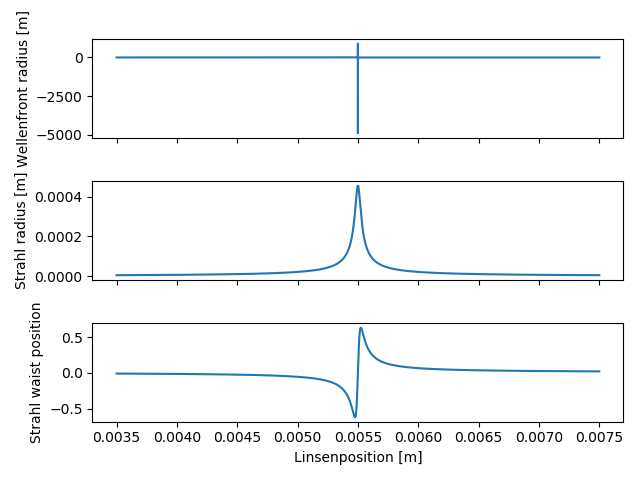

In [292]:
#dist_array = np.linspace(0,2*f_laser_collimation,100000)
dist_array = np.linspace(-0.002,0.002,100000)+f_laser_collimation
fig, ax = plt.subplots(3,sharex=True)
ax[0].plot(dist_array,p_collimated_radius(dist_array) )
ax[0].set_ylabel("Wellenfront radius [m]")
ax[1].plot(dist_array,p_collimated_w_0(dist_array) )
ax[1].set_ylabel("Strahl radius [m]")
ax[2].plot(dist_array,p_collimated_z(dist_array) )
ax[2].set_ylabel("Strahl waist position")
ax[2].set_xlabel("Linsenposition [m]")
fig.tight_layout()


## Plot von
- Strahl waist position
- Strahl durchmesser an position des Sensors

als funktion der Position der Kollimationslinse

<IPython.core.display.Javascript object>


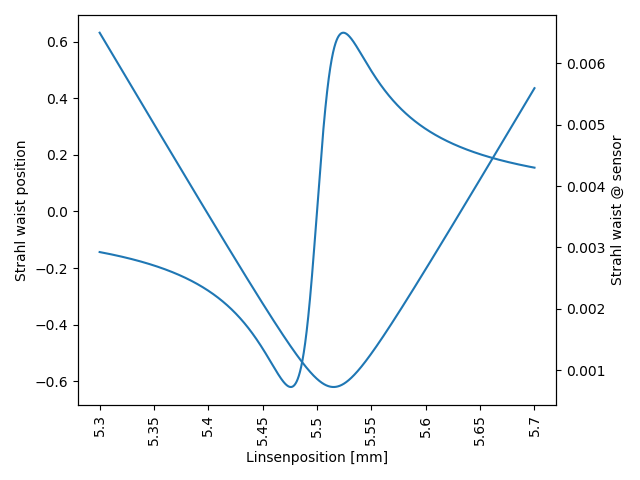

In [293]:
dist_array = np.linspace(-0.0002,0.0002,100000)+f_laser_collimation
fig, ax = plt.subplots()
ax2  = ax.twinx()
ax.plot(dist_array,p_collimated_z(dist_array) )
ax.set_ylabel("Strahl waist position")

#ax.set_xticklabels(labels)
ax2.plot(dist_array,p_collimated_sensor_w(dist_array) )
ax2.set_ylabel("Strahl waist @ sensor")
ax.set_xlabel("Linsenposition [mm]")
fig.tight_layout()
labels = [f"{(float(item.get_text())*1000):.5}" for item in ax.get_xticklabels()]
ax.set_xticklabels(labels,rotation=90)
fig.tight_layout()

### Plot des Strahlradius entlang der Strahlachse
für eine gegebene Linsenposition

<IPython.core.display.Javascript object>


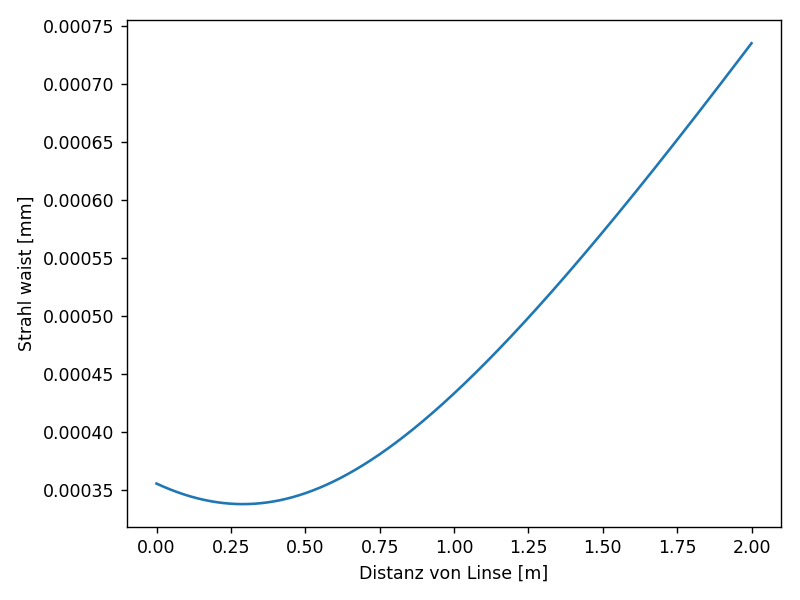

In [6]:
x = 5.51E-3
dist_array = np.linspace(0,2,100000)
fig, ax = plt.subplots()
ax.plot(dist_array,p_collimated_w(x,dist_array) )
ax.set_ylabel("Strahl waist [mm]")
ax.set_xlabel("Distanz von Linse [m]")
fig.tight_layout()
